In [1]:
import utils.scatter_tools as scatter_tools
import numpy as np
import matplotlib.pyplot as plt


In [6]:
file_name = r"f0_array_files/trio_f0_array.txt"
f0_array = np.sort(np.concatenate(np.loadtxt(file_name, delimiter=",")))
n_tones = f0_array.size

qr = 5e4
fractional_frequency_shift = 0.001
line_width_spacing_threshold = 10
repeats = 1000

fab_yield_quantity = 100
fab_yield_array = np.linspace(start=0.1, stop=1, num=fab_yield_quantity)

In [3]:
full_clash_array = np.empty(shape=(fab_yield_quantity, repeats), dtype=np.ndarray)
full_fab_yield_array = np.empty(shape=(fab_yield_quantity, repeats), dtype=np.ndarray)
for count, fab_yield in enumerate(fab_yield_array):

    current_clash_array = scatter_tools.get_clash_number_array(
        f0_array=f0_array,
        fab_yield=fab_yield,
        fractional_frequency_shift=fractional_frequency_shift,
        qr=qr,
        line_width_spacing_clash_threshold=line_width_spacing_threshold,
        repeats=repeats,
        plot_density_histogram=False,
    )

    full_clash_array[count] = current_clash_array
    full_fab_yield_array[count] = np.full(shape=current_clash_array.shape, fill_value=fab_yield)

    print(f"Variation {count} complete")


Variation 0 complete
Variation 1 complete
Variation 2 complete
Variation 3 complete
Variation 4 complete
Variation 5 complete
Variation 6 complete
Variation 7 complete
Variation 8 complete
Variation 9 complete
Variation 10 complete
Variation 11 complete
Variation 12 complete
Variation 13 complete
Variation 14 complete
Variation 15 complete
Variation 16 complete
Variation 17 complete
Variation 18 complete
Variation 19 complete
Variation 20 complete
Variation 21 complete
Variation 22 complete
Variation 23 complete
Variation 24 complete
Variation 25 complete
Variation 26 complete
Variation 27 complete
Variation 28 complete
Variation 29 complete
Variation 30 complete
Variation 31 complete
Variation 32 complete
Variation 33 complete
Variation 34 complete
Variation 35 complete
Variation 36 complete
Variation 37 complete
Variation 38 complete
Variation 39 complete
Variation 40 complete
Variation 41 complete
Variation 42 complete
Variation 43 complete
Variation 44 complete
Variation 45 complet

In [4]:
full_fab_yield_array = []
full_normalised_count_array = []
full_clash_bins_array = []
most_likely_clashes_array = []


# For each clash array get normalised count for each number of clashes:
for count, clash_array in enumerate(full_clash_array):

    minimum_clashes = np.min(clash_array)
    maximum_clashes = np.max(clash_array) + 1
    number_of_bins = maximum_clashes - minimum_clashes

    counts, clash_bins = np.histogram(clash_array, bins=number_of_bins, density=False)

    most_likely_clashes_index = np.argmax(counts)
    most_likely_clashes_array.append( clash_bins[most_likely_clashes_index])

    normalised_counts = counts / counts[most_likely_clashes_index]
    current_fab_yield_array = np.full(shape=counts.shape, fill_value=fab_yield_array[count])

    full_normalised_count_array += normalised_counts.tolist()
    full_clash_bins_array += clash_bins[:-1].tolist()
    full_fab_yield_array += current_fab_yield_array.tolist()

full_fab_yield_array = np.array(full_fab_yield_array)
full_normalised_count_array = np.array(full_normalised_count_array)
full_clash_bins_array = np.array(full_clash_bins_array)
most_likely_clashes_array = np.array(most_likely_clashes_array)



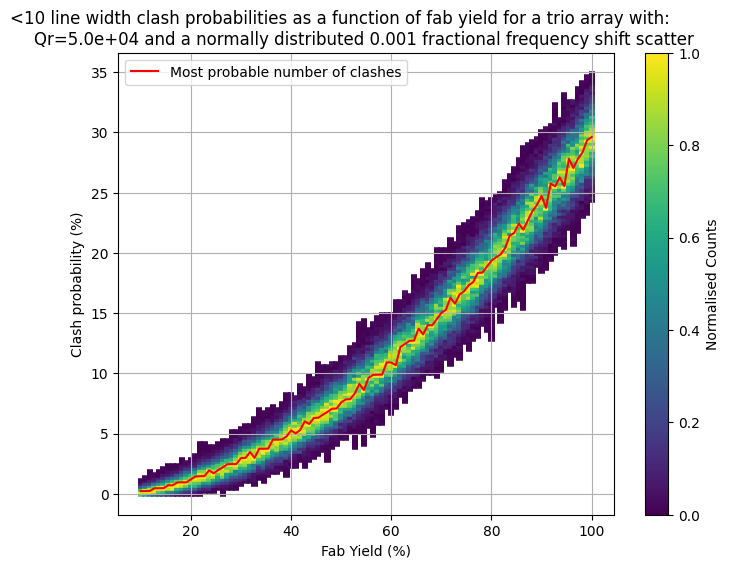

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x=full_fab_yield_array * 100, y=(full_clash_bins_array / n_tones) * 100, c=full_normalised_count_array, cmap="viridis", marker="_", facecolors="full", s=20, linewidths=4)
plt.plot(fab_yield_array * 100, (most_likely_clashes_array / n_tones) * 100, color="r", label="Most probable number of clashes")
plt.colorbar(label="Normalised Counts", orientation="vertical") 
plt.xlabel("Fab Yield (%)")
plt.ylabel("Clash probability (%)")
plt.legend()
plt.title(f"<{line_width_spacing_threshold} line width clash probabilities as a function of fab yield for a trio array with:\
          \nQr={qr:.1e} and a normally distributed {fractional_frequency_shift} fractional frequency shift scatter ")
plt.grid()
plt.show()